In [81]:
import arviz as az
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm

from sklearn.linear_model import LinearRegression

In [61]:
data = pd.read_csv('data/flats.csv')

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6042 entries, 0 to 6041
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6042 non-null   int64  
 1   price_doc   6042 non-null   int64  
 2   full_sq     6042 non-null   int64  
 3   life_sq     6042 non-null   float64
 4   num_room    6042 non-null   float64
 5   kitch_sq    6042 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 283.3 KB


In [4]:
data.head()

,Unnamed: 0,price_doc,full_sq,life_sq,num_room,kitch_sq
0,8056,2750000,11,11.0,1.0,12.0
1,8154,7100000,45,27.0,2.0,6.0
2,8287,11700000,77,50.0,3.0,8.0
3,8387,10400000,56,29.0,2.0,10.0
4,8391,6200000,31,21.0,1.0,5.0


In [38]:
data.describe()

,Unnamed: 0,price_doc,full_sq,life_sq,num_room,kitch_sq
count,6042.000000,6.042000e+03,6042.000000,6042.000000,6042.000000,6042.000000
mean,19846.990070,8.750423e+06,53.374545,33.198941,1.997021,7.391096
std,6081.011373,6.277290e+06,24.011941,20.190005,0.889523,3.806198
min,8056.000000,5.000000e+05,1.000000,0.000000,0.000000,0.000000
25%,14573.250000,5.800000e+06,38.000000,20.000000,1.000000,5.000000
50%,19871.500000,7.400000e+06,46.000000,29.000000,2.000000,7.000000
75%,25147.750000,1.050000e+07,63.000000,42.000000,3.000000,9.000000
max,30470.000000,9.512250e+07,637.000000,637.000000,17.000000,96.000000


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'price_doc'}>],
       [<AxesSubplot:title={'center':'full_sq'}>,
        <AxesSubplot:title={'center':'life_sq'}>],
       [<AxesSubplot:title={'center':'num_room'}>,
        <AxesSubplot:title={'center':'kitch_sq'}>]], dtype=object)

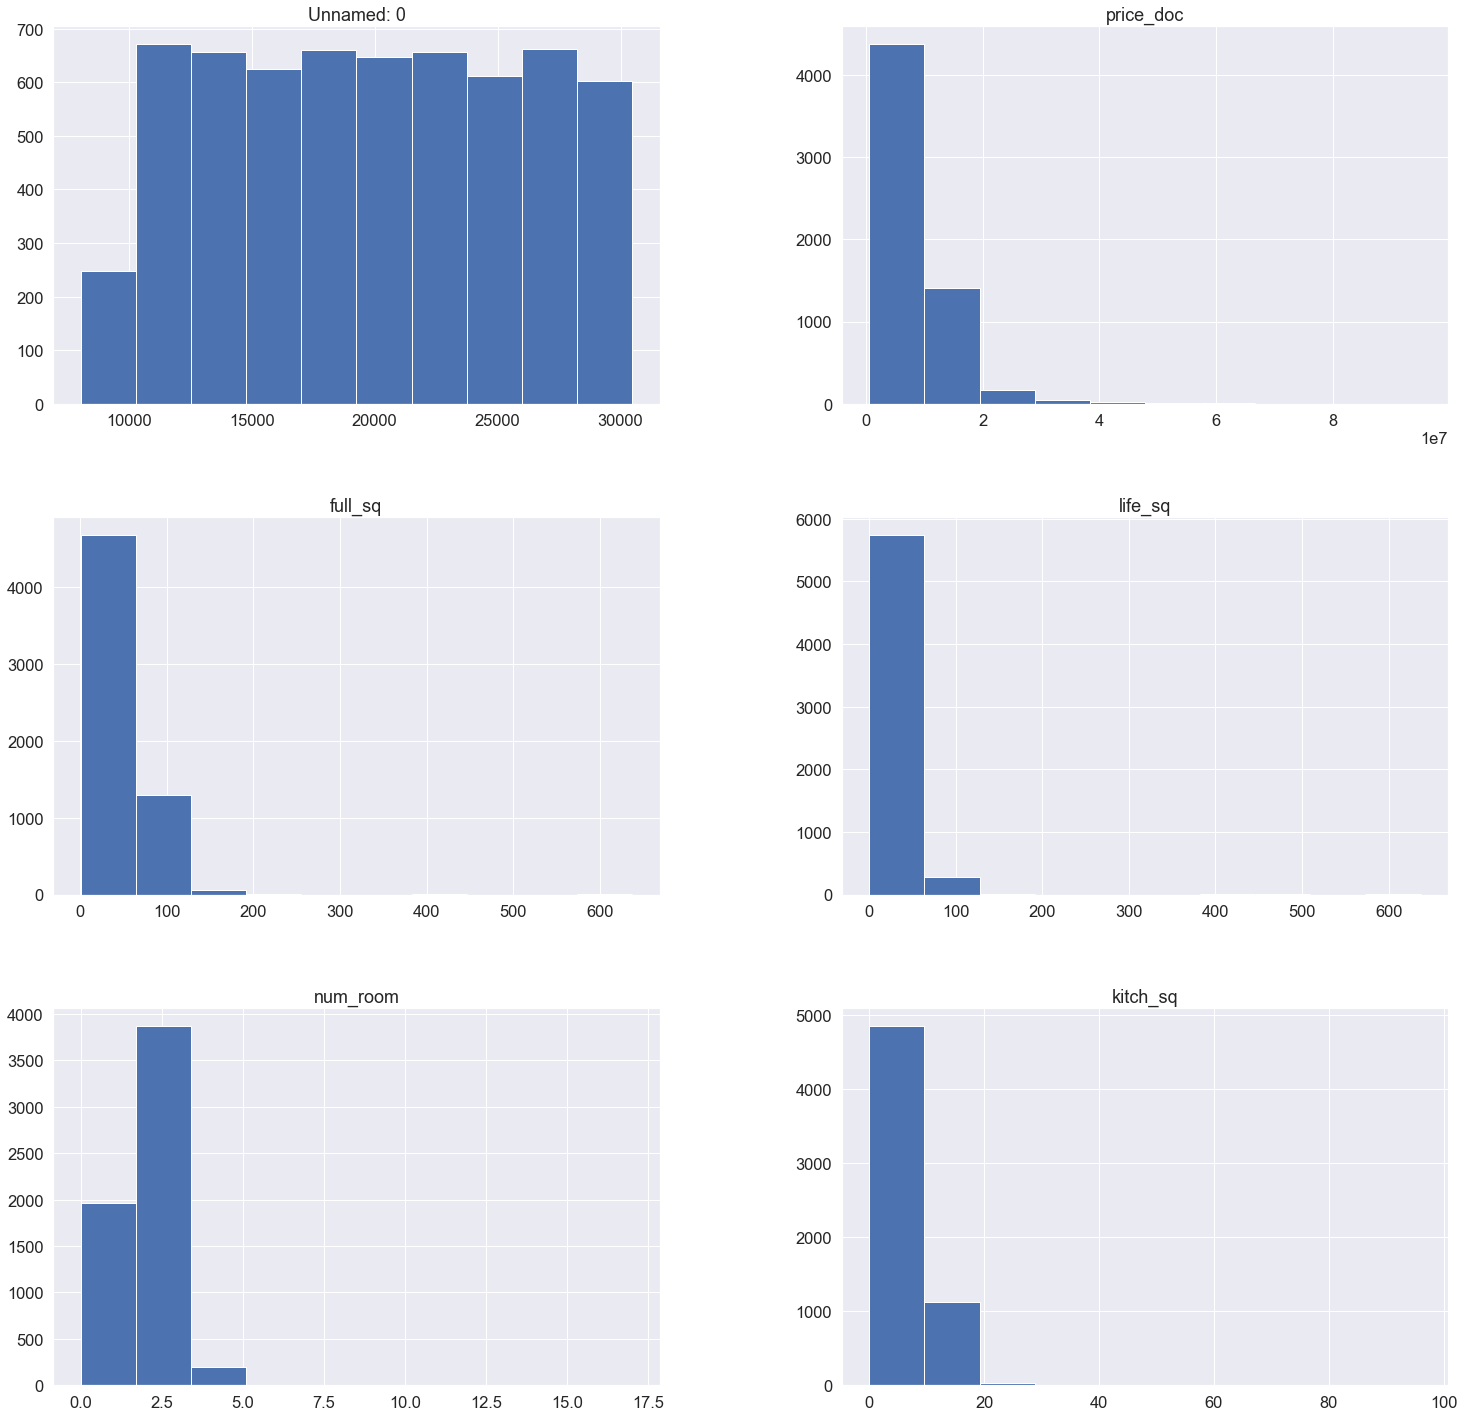

In [47]:
data.hist(figsize=(25, 25))

<AxesSubplot:>

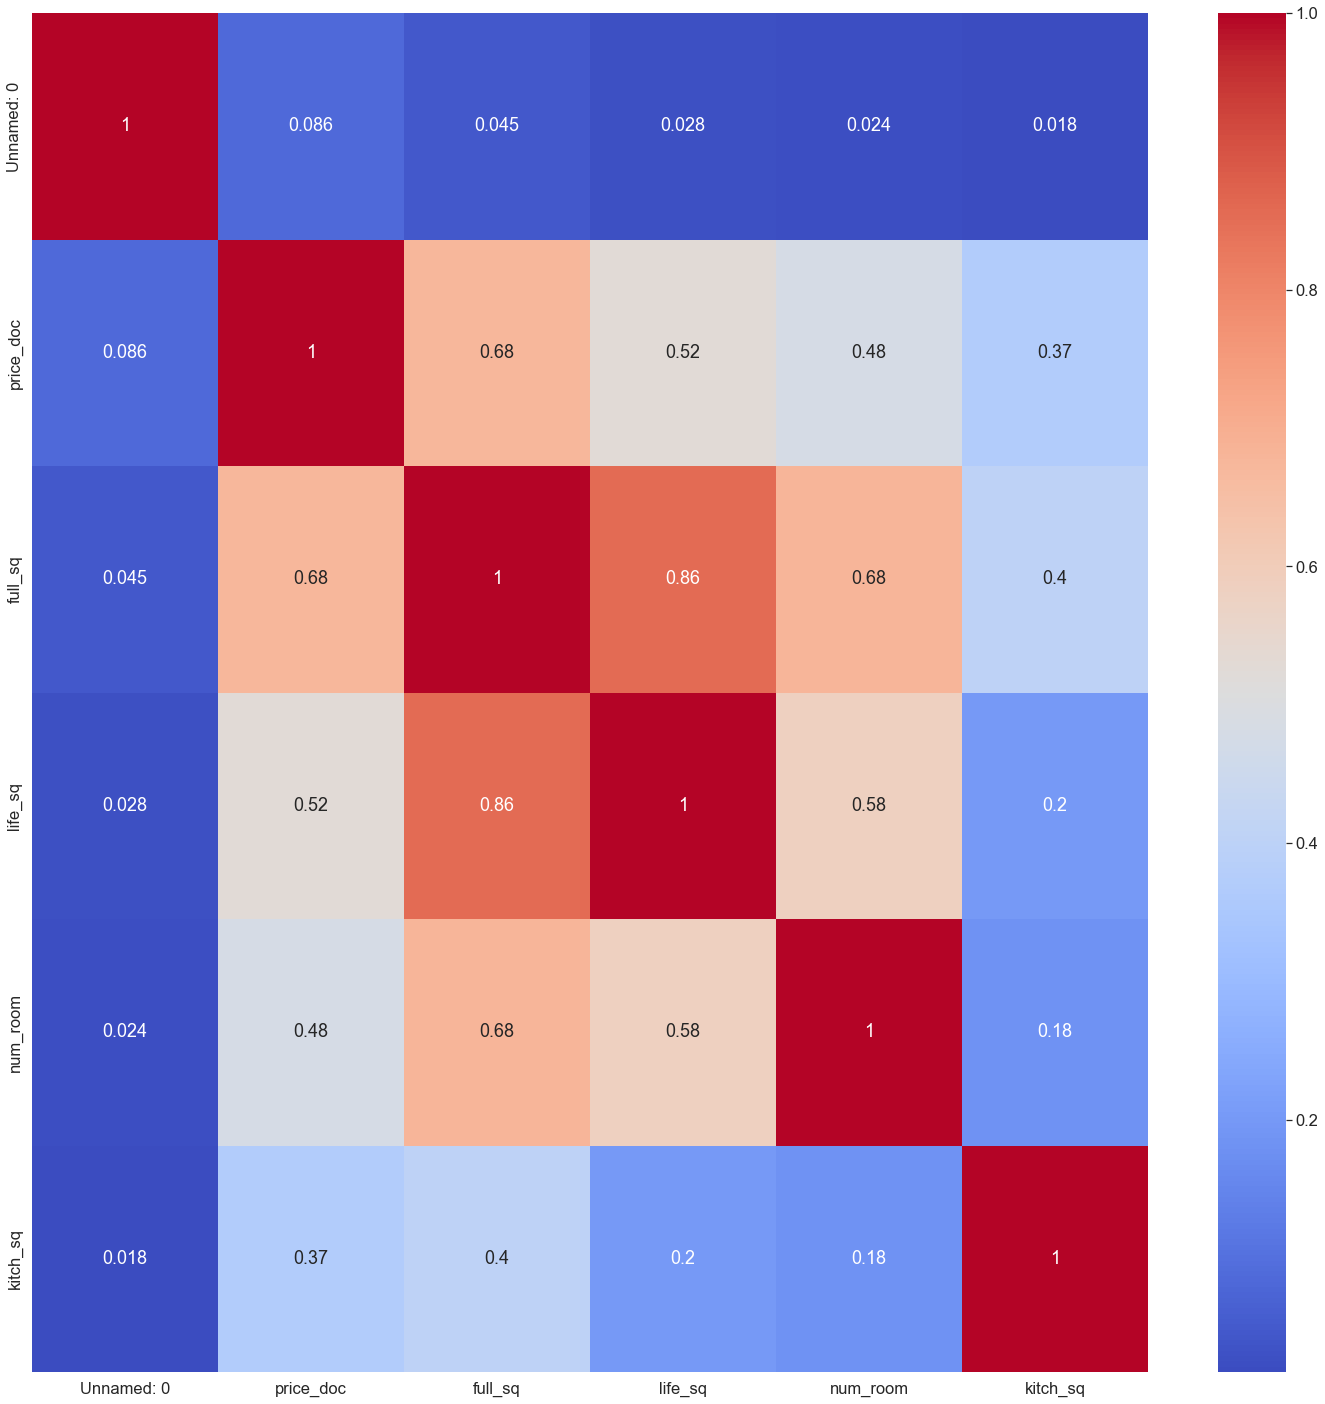

In [40]:
sns.set(font_scale=1.5)
plt.figure(figsize=(25, 25))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [67]:
data = data.loc[data.life_sq+data.kitch_sq <= data.full_sq]

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5710 entries, 1 to 6041
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5710 non-null   int64  
 1   price_doc   5710 non-null   int64  
 2   full_sq     5710 non-null   int64  
 3   life_sq     5710 non-null   float64
 4   num_room    5710 non-null   float64
 5   kitch_sq    5710 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 312.3 KB


In [75]:
data.price_doc = data.price_doc.apply(lambda x: np.log10(x))

In [76]:
data.head()

,Unnamed: 0,price_doc,full_sq,life_sq,num_room,kitch_sq
1,8154,6.851258,45,27.0,2.0,6.0
2,8287,7.068186,77,50.0,3.0,8.0
3,8387,7.017033,56,29.0,2.0,10.0
4,8391,6.792392,31,21.0,1.0,5.0
5,8410,6.774517,43,27.0,2.0,5.0


The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
C:\Users\aleksey.perepelkin\AppData\Local\Temp\ipykernel_15088\3808116102.py:3: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, kitch_sq, num_room, life_sq, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.
C:\Users\aleksey.perepelkin\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


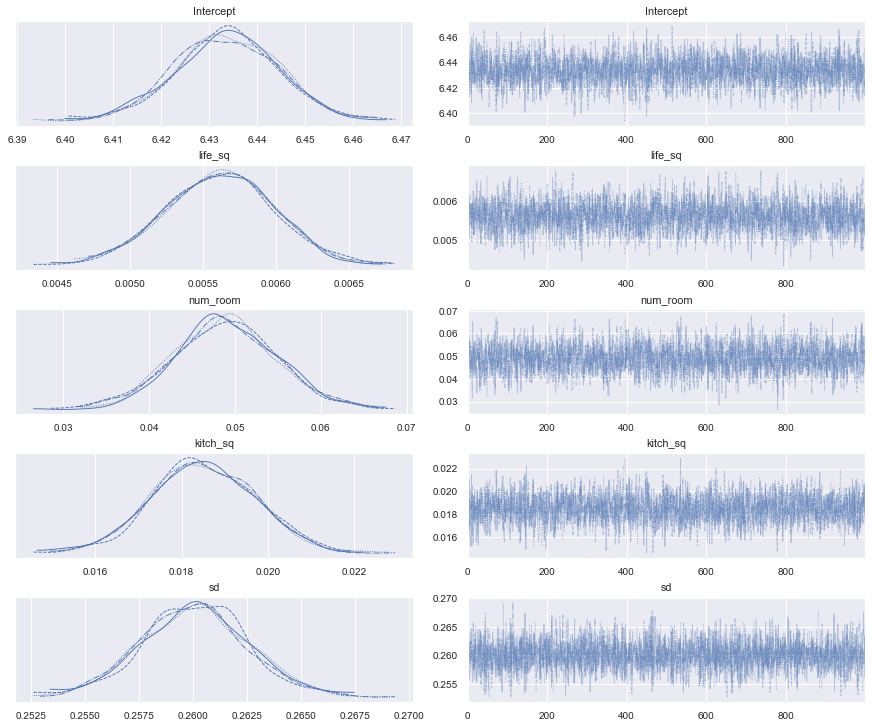

In [77]:
with pm.Model() as linear_model:
    pm.glm.GLM.from_formula('price_doc ~ life_sq + num_room + kitch_sq', data, family = pm.glm.families.Normal())
    trace = pm.sample(1000)
    
az.plot_trace(trace);

In [78]:
pm.summary(trace)

C:\Users\aleksey.perepelkin\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,6.434,0.011,6.412,6.453,0.0,0.0,2759.0,2342.0,1.0
life_sq,0.006,0.000,0.005,0.006,0.0,0.0,2392.0,2653.0,1.0
num_room,0.049,0.006,0.038,0.060,0.0,0.0,2403.0,2512.0,1.0
kitch_sq,0.019,0.001,0.016,0.021,0.0,0.0,2493.0,2214.0,1.0
sd,0.260,0.002,0.255,0.265,0.0,0.0,3834.0,2171.0,1.0


In [82]:
lr = LinearRegression()
lr.fit(data[['life_sq', 'num_room', 'kitch_sq']], data['price_doc'])

LinearRegression()

In [83]:
lr.intercept_

6.4336914260006814

In [89]:
pd.DataFrame(lr.coef_, index=['life_sq', 'num_room',  'kitch_sq'])

,0
life_sq,0.005611
num_room,0.048959
kitch_sq,0.018499
